In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import os
import scipy.stats as ss

In [2]:
sns.set(
        font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize' :(25, 12)})


In [115]:
df = pd.read_csv('B:\Karpov Courses\Stat\conversion.csv')

In [117]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [71]:
df['CPC'] = df.Spent / df.Clicks

In [73]:
df = df.dropna()

In [87]:
male = df.query('gender =="M"')
female = df.query('gender =="F"')


C:\Users\Shaetan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

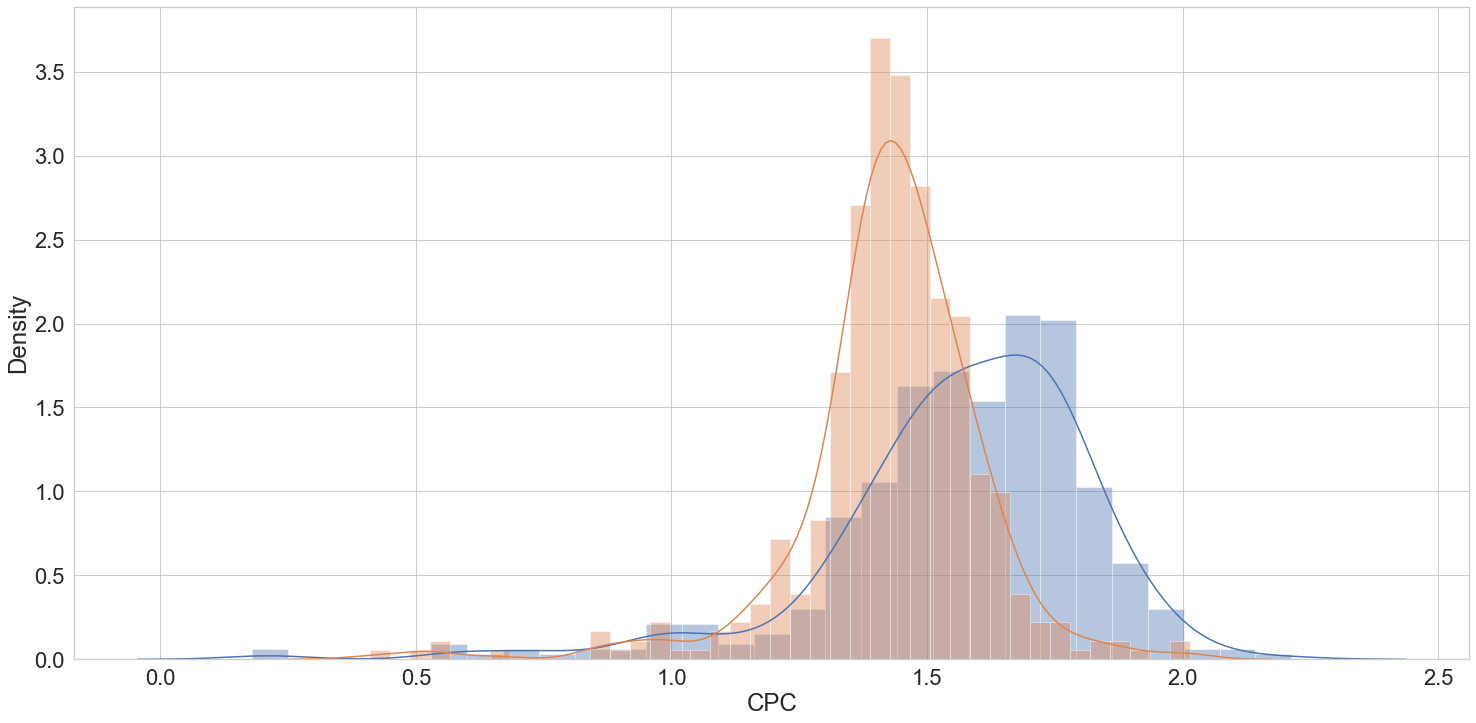

In [89]:
sns.distplot(male.CPC)
sns.distplot(female.CPC)


In [59]:
ad_clicks = df.groupby('ad_id', as_index=False)\
    .agg({'Clicks':'sum', 'Spent':'sum'})

In [61]:
ad_clicks['CPC'] = ad_clicks.Spent/ad_clicks.Clicks

In [63]:
ad_clicks = ad_clicks.dropna()

In [90]:
ad_clicks.head()

,ad_id,Clicks,Spent,CPC
0,708746,1,1.43,1.43
1,708749,2,1.82,0.91
3,708815,1,1.25,1.25
4,708818,1,1.29,1.29
6,708889,3,4.77,1.59


In [68]:
round(ss.iqr(ad_clicks.CPC),2)

0.25

C:\Users\Shaetan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC'>

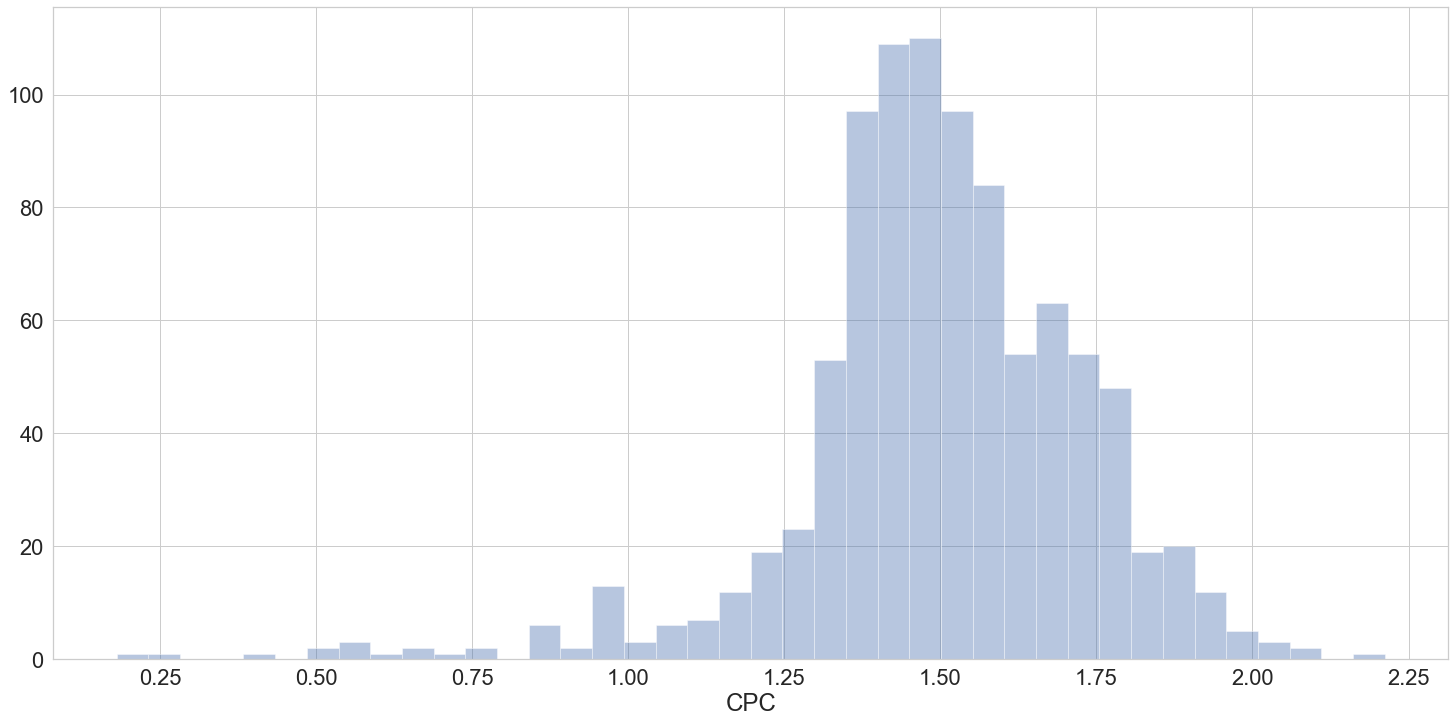

In [65]:
sns.distplot(ad_clicks.CPC, kde=False)

In [28]:
df['ctr'] = df.Clicks/df['Impressions']

<AxesSubplot:xlabel='Impressions', ylabel='Count'>

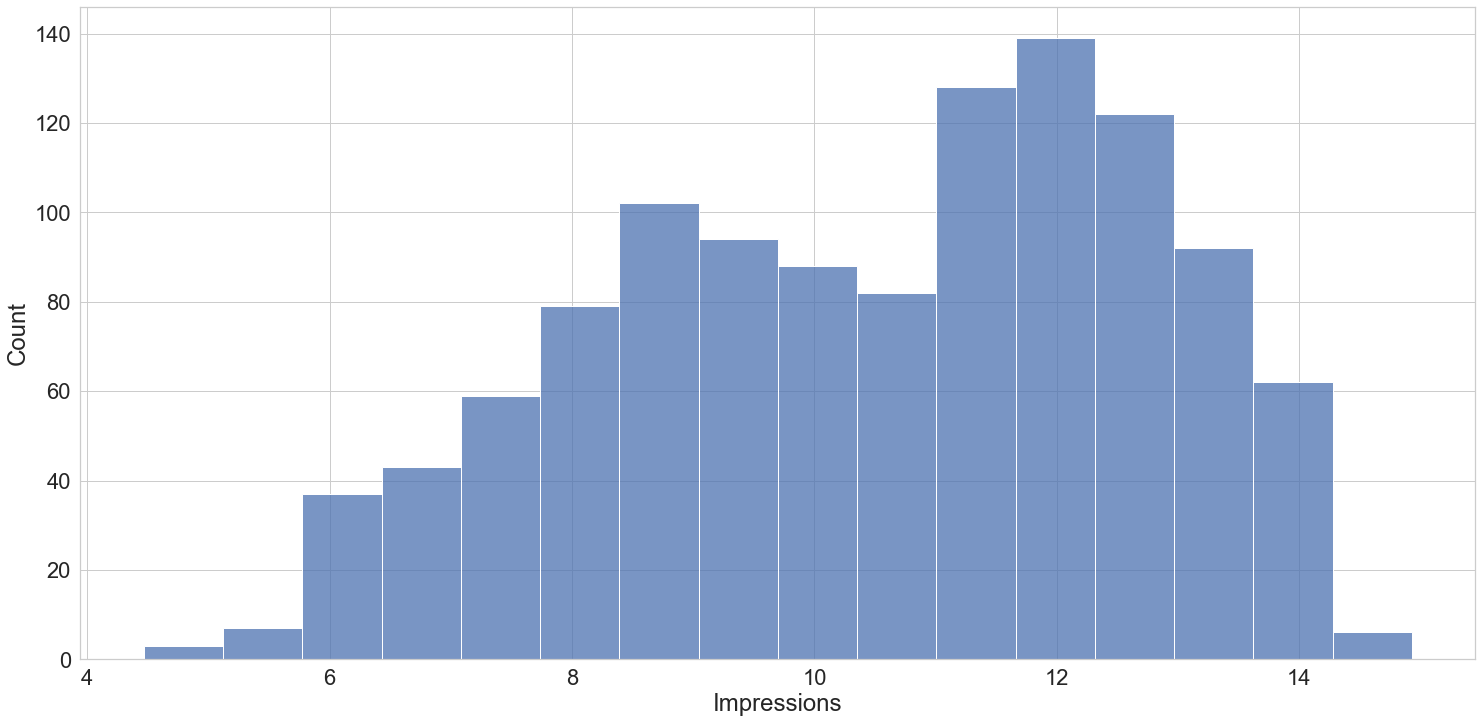

In [18]:
sns.histplot(data = df['Impressions'])

In [36]:
df.loc[df['ctr'].idxmax(), 'ad_id']

738637

In [47]:
df = df.query('xyz_campaign_id == 916')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


C:\Users\Shaetan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

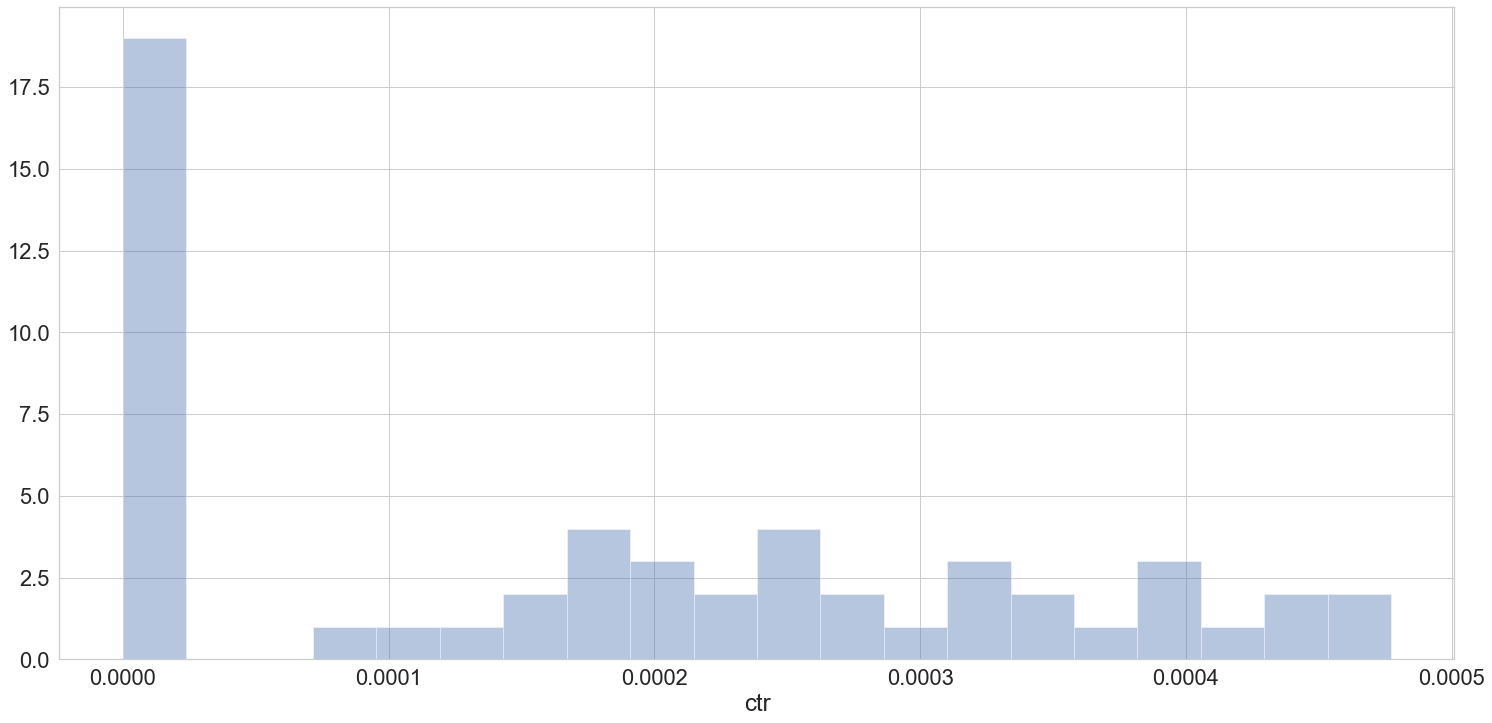

In [48]:
sns.distplot(df.ctr, bins=20, kde = False)

In [103]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,100.0


In [112]:
df['CR'] = round((df.Approved_Conversion/df.Clicks)*100, 2)

In [114]:
df.query('ad_id == 1121814').CR

860    3.09
Name: CR, dtype: float64

In [110]:
df.ad_id.max()

1314415